## Data Sourcing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_lending = pd.read_csv('loan.csv', low_memory=False)

print(df_lending.shape)

(39717, 111)


In [2]:
print(df_lending.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [3]:
df_lending.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df_lending = df_lending.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "funded_amount_investor",
                       "int_rate": "interest_rate", "annual_inc": "annual_income", "issue_d": "issue_date", 
                    "inq_last_6mths": "Inquiry_last_6mths","inq_last_12mths": "Inquiry_last_12mths",
                    "pub_rec": "public_record","total_pymnt": "total_payment","total_acc": "total_account"})

df_lending.columns

Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

In [5]:
# Removing all NA columns

df_lending1 = df_lending.loc[:,df_lending.count()!=0]
print(df_lending1.shape)
print(df_lending1.columns)


(39717, 57)
Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_income', 'verification_status', 'issue_date', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_payment', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_m

In [6]:
df_lending1['application_type'].value_counts()


INDIVIDUAL    39717
Name: application_type, dtype: int64

In [7]:
df_lending1['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [8]:
df_lending1['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [9]:
df_lending1['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [10]:
df_lending1[['collections_12_mths_ex_med','chargeoff_within_12_mths']].groupby(['collections_12_mths_ex_med','chargeoff_within_12_mths']).size()

collections_12_mths_ex_med  chargeoff_within_12_mths
0.0                         0.0                         39661
dtype: int64

In [11]:
df_lending1['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [12]:
df_lending1['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [13]:
# Removing all columns with Same value (NON Unique) in it and Zeros&NA in that column

nunique = df_lending1.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_lending2 = df_lending1.drop(cols_to_drop, axis=1)

print(df_lending2.shape)
print(df_lending2.columns)

(39717, 48)
Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_income', 'verification_status', 'issue_date', 'loan_status',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'Inquiry_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'public_record', 'revol_bal', 'revol_util', 'total_account',
       'out_prncp', 'out_prncp_inv', 'total_payment', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [14]:
df_lending2['url'][1]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'

In [15]:
row , column= df_lending2.shape
((df_lending2.isnull().sum()/ row) * 100).sort_values(ascending=False)

next_pymnt_d               97.129693
mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
desc                       32.580507
emp_title                   6.191303
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
funded_amount_investor      0.000000
verification_status         0.000000
member_id                   0.000000
url                         0.000000
loan_status                 0.000000
issue_date                  0.000000
loan_amount                 0.000000
annual_income               0.000000
term                        0.000000
home_ownership              0.000000
funded_amount               0.000000
sub_grade                   0.000000
grade                       0.000000
installment                 0.000000
interest_rate               0.000000
purpose                     0.000000
d

In [16]:
#Dropping columns which are not relevant to analysis 

df_loan_lc = df_lending2.drop(columns = ['url','emp_title', 'desc', 'zip_code', 'title'])

# Dropping the column which has Maximum Nulls and also we cannot assume date for this column
df_loan_lc = df_loan_lc.drop(columns=['next_pymnt_d'])

print(df_loan_lc.shape)
print(df_loan_lc.columns)

(39717, 42)
Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [17]:
#Converting date column to appropriate format
df_loan_lc['issue_date'] = pd.to_datetime(df_loan_lc['issue_date'].str.upper(),format='%b-%y')
df_loan_lc['earliest_cr_line'] = pd.to_datetime(df_loan_lc['earliest_cr_line'].str.upper(),format='%b-%y')
df_loan_lc['last_pymnt_d'] = pd.to_datetime(df_loan_lc['last_pymnt_d'].str.upper(),format='%b-%y')
df_loan_lc['last_credit_pull_d'] = pd.to_datetime(df_loan_lc['last_credit_pull_d'].str.upper(),format='%b-%y')

df_loan_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amount                39717 non-null int64
funded_amount              39717 non-null int64
funded_amount_investor     39717 non-null float64
term                       39717 non-null object
interest_rate              39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_income              39717 non-null float64
verification_status        39717 non-null object
issue_date                 39717 non-null datetime64[ns]
loan_status                39717 non-null object
purpose                    39717 non-null object
addr_state                 39717 non-null object
dt

In [18]:
row , column= df_loan_lc.shape
((df_loan_lc.isnull().sum()/ row) * 100).sort_values(ascending=False)


mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
last_credit_pull_d          0.005036
loan_status                 0.000000
issue_date                  0.000000
verification_status         0.000000
annual_income               0.000000
home_ownership              0.000000
sub_grade                   0.000000
addr_state                  0.000000
grade                       0.000000
installment                 0.000000
interest_rate               0.000000
term                        0.000000
funded_amount_investor      0.000000
funded_amount               0.000000
loan_amount                 0.000000
member_id                   0.000000
purpose                     0.000000
earliest_cr_line            0.000000
dti                         0.000000
delinq_2yrs                 0.000000
last_pymnt_amnt             0.000000
c

In [19]:
# Filling the null values

df_loan_lc['mths_since_last_delinq'] = df_loan_lc.mths_since_last_delinq.fillna(value=0)
df_loan_lc['mths_since_last_record'] = df_loan_lc.mths_since_last_record.fillna(value=0)

df_loan_lc['mths_since_last_delinq']=df_loan_lc['mths_since_last_delinq'].astype('int')
df_loan_lc['mths_since_last_record']=df_loan_lc['mths_since_last_record'].astype('int')
#df_lend_club['desc']=df_lend_club['desc'].astype('str')
row , column= df_loan_lc.shape
((df_loan_lc.isnull().sum()/ row) * 100).sort_values(ascending=False)


emp_length                 2.706650
pub_rec_bankruptcies       1.754916
last_pymnt_d               0.178765
revol_util                 0.125891
last_credit_pull_d         0.005036
funded_amount              0.000000
member_id                  0.000000
addr_state                 0.000000
purpose                    0.000000
loan_status                0.000000
issue_date                 0.000000
verification_status        0.000000
annual_income              0.000000
home_ownership             0.000000
funded_amount_investor     0.000000
loan_amount                0.000000
dti                        0.000000
grade                      0.000000
installment                0.000000
interest_rate              0.000000
term                       0.000000
sub_grade                  0.000000
earliest_cr_line           0.000000
delinq_2yrs                0.000000
total_payment              0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
recoveries                 0

In [20]:
#Imputed value for pub_rec_bankruptcies 

df_loan_lc['pub_rec_bankruptcies'] = df_loan_lc.apply(lambda x : x['public_record'] if x['mths_since_last_record'] >= 85 else 0,axis=1)
row , column= df_loan_lc.shape
((df_loan_lc.isnull().sum()/ row) * 100).sort_values(ascending=False)

emp_length                 2.706650
last_pymnt_d               0.178765
revol_util                 0.125891
last_credit_pull_d         0.005036
addr_state                 0.000000
purpose                    0.000000
loan_status                0.000000
issue_date                 0.000000
verification_status        0.000000
annual_income              0.000000
home_ownership             0.000000
pub_rec_bankruptcies       0.000000
dti                        0.000000
grade                      0.000000
installment                0.000000
interest_rate              0.000000
term                       0.000000
funded_amount_investor     0.000000
funded_amount              0.000000
loan_amount                0.000000
member_id                  0.000000
sub_grade                  0.000000
earliest_cr_line           0.000000
delinq_2yrs                0.000000
total_payment              0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
recoveries                 0

In [21]:
df_loan_lc1 = df_loan_lc.copy()
df_loan_lc1['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [22]:
def emp_len(df_loan_lc1):

    if (df_loan_lc1['emp_length'] == '10+ years'):
        return '10'
    elif (df_loan_lc1['emp_length'] == '< 1 year'):
        return '0'
    elif (df_loan_lc1['emp_length'] == '1 year'):
        return '1'
    elif (df_loan_lc1['emp_length'] == '2 years'):
        return '2'
    elif (df_loan_lc1['emp_length'] == '3 years'):
        return '3'
    elif (df_loan_lc1['emp_length'] == '4 years'):
        return '4'
    elif (df_loan_lc1['emp_length'] == '5 years'):
        return '5'
    elif (df_loan_lc1['emp_length'] == '6 years'):
        return '6'
    elif (df_loan_lc1['emp_length'] == '7 years'):
        return '7'
    elif (df_loan_lc1['emp_length'] == '8 years'):
        return '8'
    elif (df_loan_lc1['emp_length'] == '9 years'):
        return '9'
    elif (df_loan_lc1['emp_length'] == '10 years'):
        return '10'
    else:
        return '0'
        
    
df_loan_lc1['emp_length'] = df_loan_lc1.apply(emp_len, axis = 1)
print(df_loan_lc1.columns)

Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [23]:
df_loan_lc1['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

In [24]:
row , column= df_loan_lc1.shape
((df_loan_lc1.isnull().sum()/ row) * 100).sort_values(ascending=False)

last_pymnt_d               0.178765
revol_util                 0.125891
last_credit_pull_d         0.005036
emp_length                 0.000000
addr_state                 0.000000
purpose                    0.000000
loan_status                0.000000
issue_date                 0.000000
verification_status        0.000000
annual_income              0.000000
home_ownership             0.000000
pub_rec_bankruptcies       0.000000
dti                        0.000000
grade                      0.000000
installment                0.000000
interest_rate              0.000000
term                       0.000000
funded_amount_investor     0.000000
funded_amount              0.000000
loan_amount                0.000000
member_id                  0.000000
sub_grade                  0.000000
earliest_cr_line           0.000000
delinq_2yrs                0.000000
total_payment              0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
recoveries                 0

# Univariate Analysis

In [25]:
df_lend_club = df_loan_lc1.copy()
df_lend_club.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [26]:
def defaulters(df_lend_club):

    if (df_lend_club['loan_status'] == 'Charged Off'):
        return 1
    else:
        return 0
df_lend_club['defaulters'] = df_lend_club.apply(defaulters, axis = 1)

print(df_lend_club.columns)
df_lend_club.info()


#(df_lend_club.isnull().sum()/ row) * 100

Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulters'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
id                         39717 non-null int64
member_id             

In [27]:
df_lend_club['issue_year'] = df_lend_club['issue_date'].dt.year
df_lend_club['issue_year']= df_lend_club['issue_year'].astype('str')

print(df_lend_club.columns)
df_lend_club.info()

Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulters', 'issue_year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
id                         39717 non-null int64
member_i

In [28]:
df_lend_club['interest_rate'] = df_lend_club.interest_rate.apply(lambda x: x.replace('%','')) 
df_lend_club['interest_rate']=df_lend_club['interest_rate'].astype('float64')

df_lend_club.head(5)

,id,member_id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,defaulters,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0,0,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0,1,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0,0,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0,0,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0,0,2011


In [29]:
# Added the Range for analysis on Interest_rate

def range_int(df_lend_club):

    if (df_lend_club['interest_rate'] > 0) and (df_lend_club['interest_rate'] <= 5):
        return '0-5'
    elif (df_lend_club['interest_rate'] > 5) and (df_lend_club['interest_rate'] <= 10):
        return '5-10'
    elif (df_lend_club['interest_rate'] > 10) and (df_lend_club['interest_rate'] <= 15):
        return '10-15'
    elif (df_lend_club['interest_rate'] > 15) and (df_lend_club['interest_rate'] <= 20):
        return '15-20'
    elif (df_lend_club['interest_rate'] > 20) and (df_lend_club['interest_rate'] <= 25):
        return '20-25'

df_lend_club['interest_Range'] = df_lend_club.apply(range_int, axis = 1)
print(df_lend_club.columns)
print(df_lend_club.head(5))

Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulters', 'issue_year', 'interest_Range'],
      dtype='object')
        id  member_id  loan_amount  funded_amount  funded_amount_investor  \
0  1077501    1296599         5000           5000                  497

In [30]:
((df_lend_club.isnull().sum()/ row) * 100).sort_values(ascending=False)

last_pymnt_d               0.178765
revol_util                 0.125891
last_credit_pull_d         0.005036
interest_Range             0.000000
emp_length                 0.000000
dti                        0.000000
addr_state                 0.000000
purpose                    0.000000
loan_status                0.000000
issue_date                 0.000000
verification_status        0.000000
annual_income              0.000000
home_ownership             0.000000
sub_grade                  0.000000
earliest_cr_line           0.000000
grade                      0.000000
installment                0.000000
interest_rate              0.000000
term                       0.000000
funded_amount_investor     0.000000
funded_amount              0.000000
loan_amount                0.000000
member_id                  0.000000
delinq_2yrs                0.000000
mths_since_last_delinq     0.000000
Inquiry_last_6mths         0.000000
issue_year                 0.000000
defaulters                 0

In [31]:
# Univariate analysis on Numberic and Float columns
df_lend_club.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amount,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amount,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amount_investor,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
interest_rate,39717.0,12.021177,3.724825,5.42,9.25,11.860000,1.459000e+01,2.459000e+01
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_income,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01


In [32]:
# Categorized on Defaulters or not based on Count

df_loan_status = df_lend_club[['defaulters']].groupby(['defaulters']).agg(Total =('defaulters', 'count'))
df_loan_status['Total_Overall'] = df_loan_status.Total.sum()
df_loan_status['Percent'] = (df_loan_status['Total']/df_loan_status['Total_Overall'])*100
print(df_loan_status.head())
df_loan_status = df_loan_status.reset_index().set_index('defaulters', drop=False)
print(df_loan_status.columns)

            Total  Total_Overall    Percent
defaulters                                 
0           34090          39717  85.832263
1            5627          39717  14.167737
Index(['defaulters', 'Total', 'Total_Overall', 'Percent'], dtype='object')


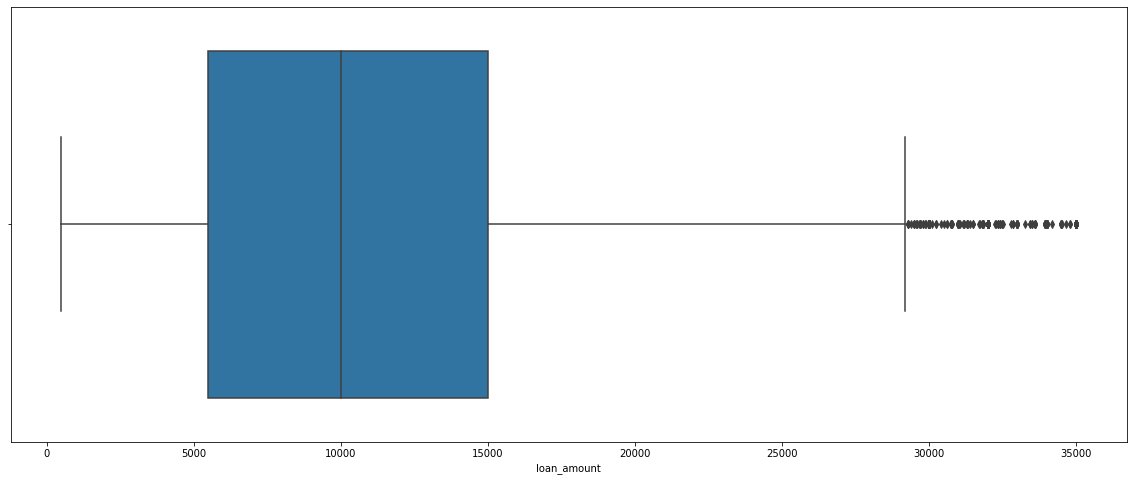

In [33]:
#Boxplot on loan amount by the borrower

plt.figure(figsize=(20,8))
sns.boxplot(x = 'loan_amount' , data = df_lend_club)
plt.show()

In [34]:

df_lend_club['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

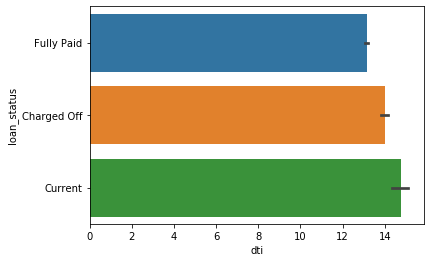

In [35]:
sns.barplot(x='dti', y='loan_status', data=df_lend_club)

## Segmented Univariate Analysis

            Total
term             
 36 months  29096
 60 months  10621
Index(['term', 'Total'], dtype='object')


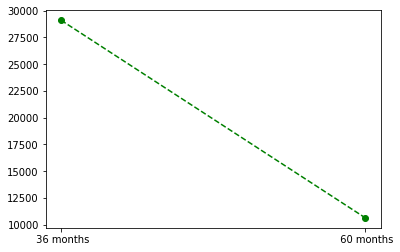

In [36]:
# Analysis on term , how many member paying on each term - Ordered categorical variables

df_term = df_lend_club[['term']].groupby(['term']).agg(Total =('term', 'count'))
print(df_term.head())
df_term = df_term.reset_index().set_index('term', drop=False)
print(df_term.columns)
plt.plot(df_term['term'],df_term['Total'],'go--')
plt.show()

       Total
grade       
A      10085
B      12020
C       8098
D       5307
E       2842
Index(['grade', 'Total'], dtype='object')


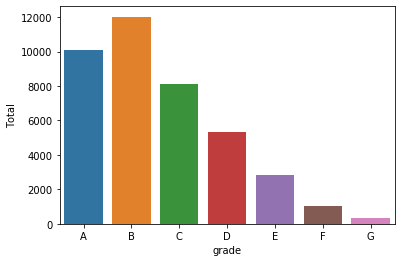

In [37]:
# Grade

df_grade = df_lend_club[['grade']].groupby(['grade']).agg(Total =('grade', 'count'))
print(df_grade.head())
df_grade = df_grade.reset_index().set_index('grade', drop=False)
print(df_grade.columns)
sns.barplot(x = 'grade' , y = 'Total' , data = df_grade)
plt.show()

            Total  Total_Overall    Percent
defaulters                                 
0           34090          39717  85.832263
1            5627          39717  14.167737
Index(['defaulters', 'Total', 'Total_Overall', 'Percent'], dtype='object')


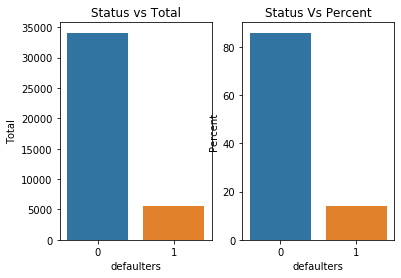

In [38]:
#defaulters

df_loan_status = df_lend_club[['defaulters']].groupby(['defaulters']).agg(Total =('defaulters', 'count'))
df_loan_status['Total_Overall'] = df_loan_status.Total.sum()
df_loan_status['Percent'] = (df_loan_status['Total']/df_loan_status['Total_Overall'])*100
print(df_loan_status.head())
df_loan_status = df_loan_status.reset_index().set_index('defaulters', drop=False)
print(df_loan_status.columns)

plt.subplot(121) #equivalent to plt.subplot(1,2,1)
plt.title("Status vs Total")
sns.barplot(x= df_loan_status['defaulters'],y=df_loan_status['Total'],data = df_loan_status)

plt.subplot(122) #equivalent to plt.subplot(1,2,2)
plt.title("Status Vs Percent")
sns.barplot(x=df_loan_status['defaulters'],y=df_loan_status['Percent'],data = df_loan_status)

plt.show()

#We have 14% who are defaulters

In [39]:
# Creating the dataframe with Defaulters ,we can use this to see the below analysis on respective
# column otherwise comment we can comment it
df_lend_club_df = df_lend_club.copy()
df_lend_club = df_lend_club.loc[df_lend_club.defaulters == 1] 
#df_lend_club.shape

            Total
issue_year       
2007           45
2008          247
2009          594
2010         1485
2011         3256
Index(['issue_year', 'Total'], dtype='object')


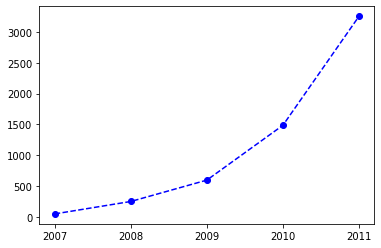

In [40]:
# Issue_year

df_issue_year = df_lend_club[['issue_year']].groupby(['issue_year']).agg(Total =('issue_year', 'count'))
print(df_issue_year.head())
df_issue_year = df_issue_year.reset_index().set_index('issue_year', drop=False)
print(df_issue_year.columns)
plt.plot(df_issue_year['issue_year'],df_issue_year['Total'],'bo--')
plt.show()

## Number of Loans has been increased Year by Year

       Total
grade       
A        602
B       1425
C       1347
D       1118
E        715
Index(['grade', 'Total'], dtype='object')


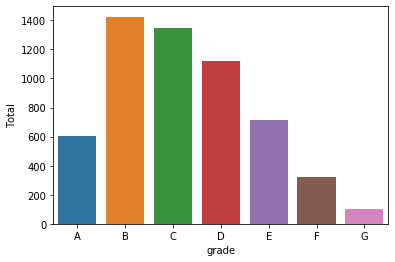

In [41]:
# Grade - analysis on Defaulters

df_grade = df_lend_club[['grade']].groupby(['grade']).agg(Total =('grade', 'count'))
print(df_grade.head())
df_grade = df_grade.reset_index().set_index('grade', drop=False)
print(df_grade.columns)
sns.barplot(x = 'grade' , y = 'Total' , data = df_grade)
plt.show()

            Total
term             
 36 months   3227
 60 months   2400
Index(['term', 'Total'], dtype='object')


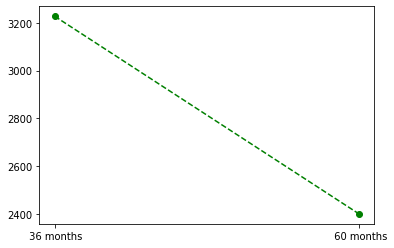

In [42]:
# term - analysis on Defaulters

df_term = df_lend_club[['term']].groupby(['term']).agg(Total =('term', 'count'))
print(df_term.head())
df_term = df_term.reset_index().set_index('term', drop=False)
print(df_term.columns)
plt.plot(df_term['term'],df_term['Total'],'go--')
plt.show()

purpose
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: Total, dtype: int64


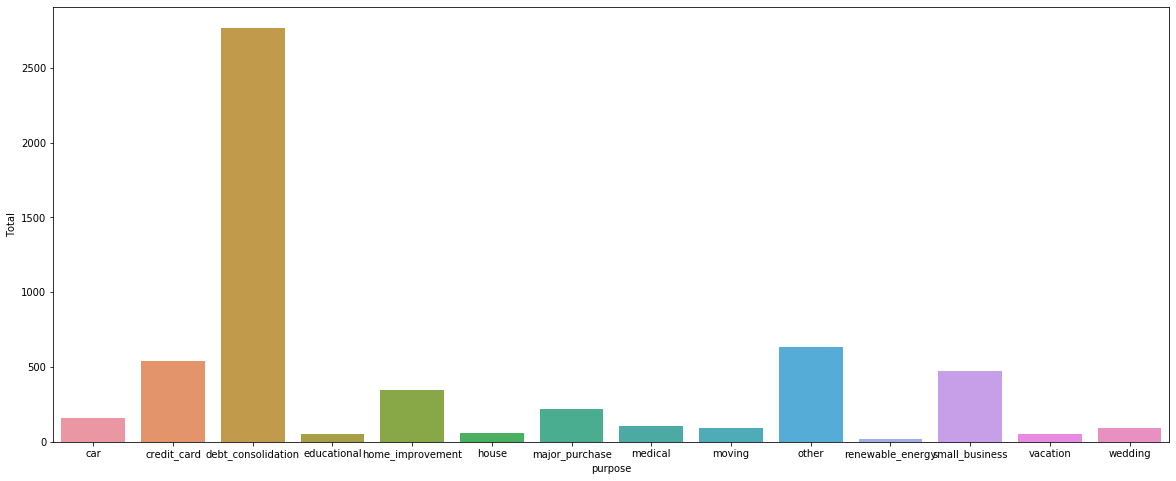

In [43]:
# purpose - analysis on Defaulters

df_purpose = df_lend_club[['purpose']].groupby(['purpose']).agg(Total =('purpose', 'count'))
#print(df_purpose.head(15))
df_purpose = df_purpose.reset_index().set_index('purpose', drop=False)
print(df_purpose.Total.sort_values(ascending = False))
plt.figure(figsize=(20,8))
sns.barplot(x = 'purpose' , y = 'Total' , data = df_purpose)
plt.show()

verification_status
Not Verified       2142
Verified           2051
Source Verified    1434
Name: Total, dtype: int64


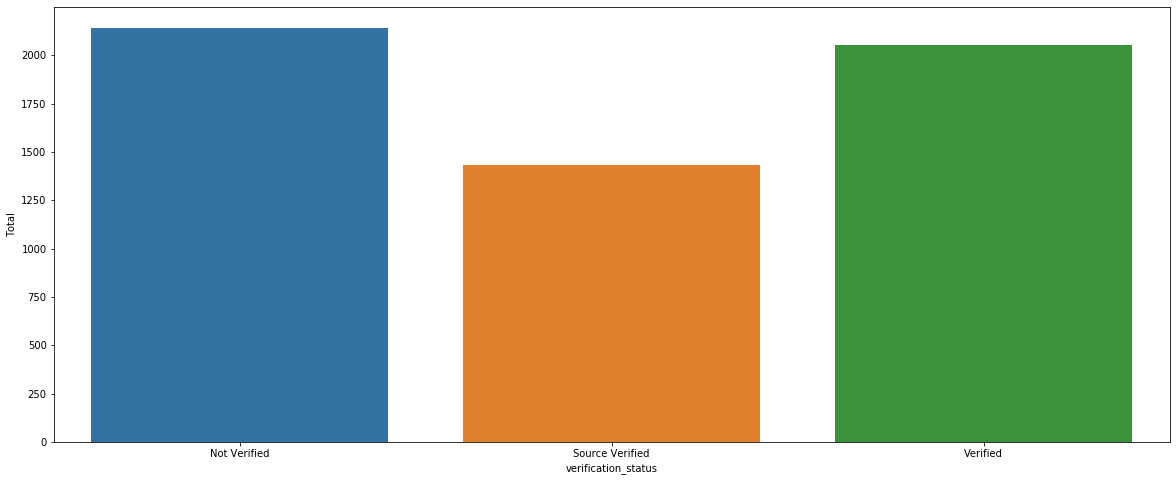

In [44]:
# verification_status - analysis on Defaulters

df_ver_status = df_lend_club[['verification_status']].groupby(['verification_status']).agg(Total =('verification_status', 'count'))

df_ver_status = df_ver_status.reset_index().set_index('verification_status', drop=False)
print(df_ver_status.Total.sort_values(ascending = False))
plt.figure(figsize=(20,8))
sns.barplot(x = 'verification_status' , y = 'Total' , data = df_ver_status)
plt.show()

interest_Range
10-15    2707
15-20    1794
5-10      830
20-25     296
Name: Total, dtype: int64


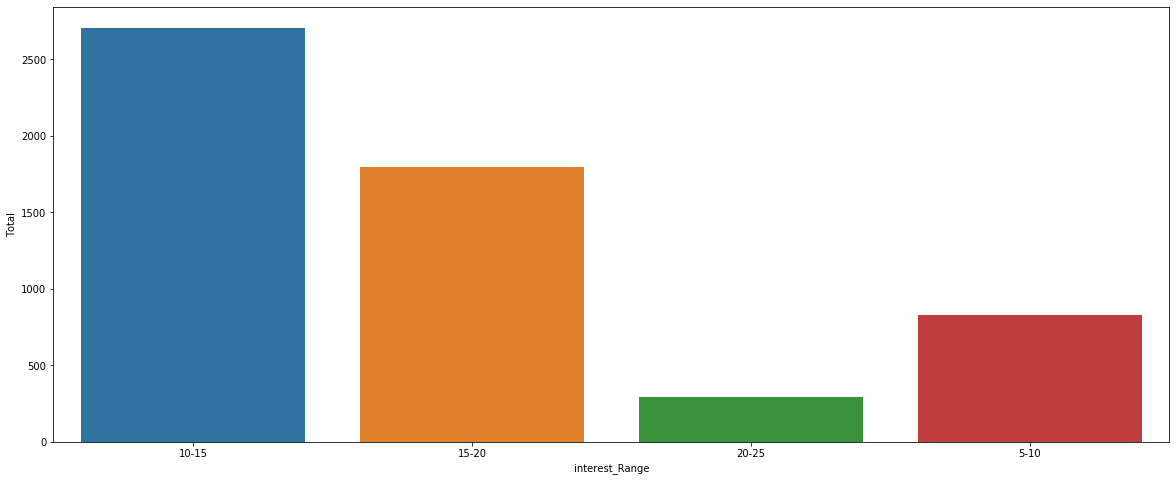

In [45]:
# interest_Range - analysis on Defaulters

df_Int_rate_range = df_lend_club[['interest_Range']].groupby(['interest_Range']).agg(Total =('interest_Range', 'count'))

df_Int_rate_range = df_Int_rate_range.reset_index().set_index('interest_Range', drop=False)
print(df_Int_rate_range.Total.sort_values(ascending = False))
plt.figure(figsize=(20,8))
sns.barplot(x = 'interest_Range' , y = 'Total' , data = df_Int_rate_range)
plt.show()

emp_length
10    1331
0      867
2      567
3      555
4      462
5      458
1      456
6      307
7      263
8      203
9      158
Name: Total, dtype: int64


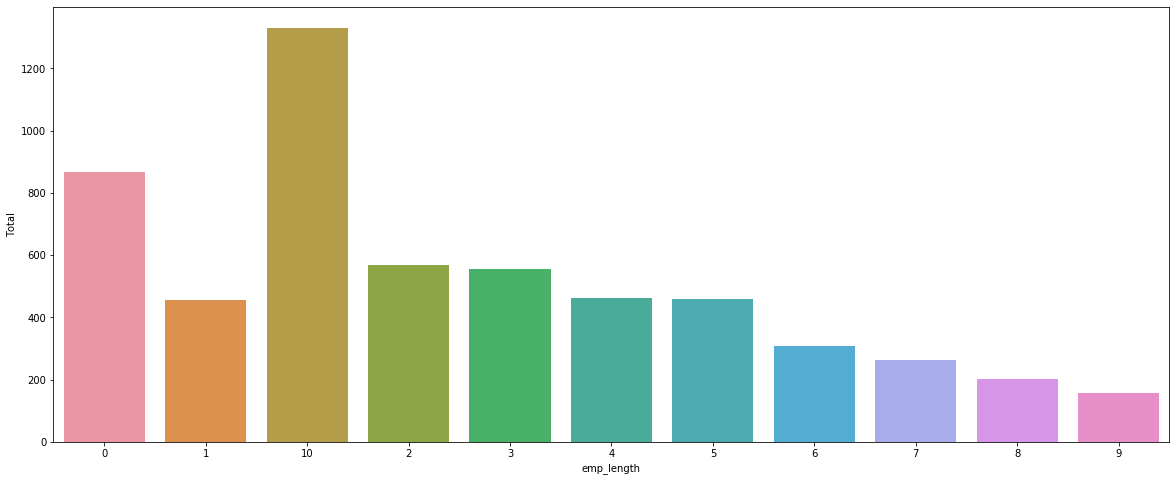

In [46]:
# emp_length - analysis on Defaulters

df_emp_length = df_lend_club[['emp_length']].groupby(['emp_length']).agg(Total =('emp_length', 'count'))

df_emp_length = df_emp_length.reset_index().set_index('emp_length', drop=False)
print(df_emp_length.Total.sort_values(ascending = False))
plt.figure(figsize=(20,8))
sns.barplot(x = 'emp_length' , y = 'Total' , data = df_emp_length)
plt.show()

addr_state
CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
MA     159
OH     155
WA     127
AZ     123
NC     114
MO     114
NV     108
MI     103
CO      98
CT      94
MN      81
OR      71
SC      66
WI      63
AL      54
LA      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
RI      25
NH      25
WV      21
AK      15
DC      15
SD      12
DE      12
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: Total, dtype: int64


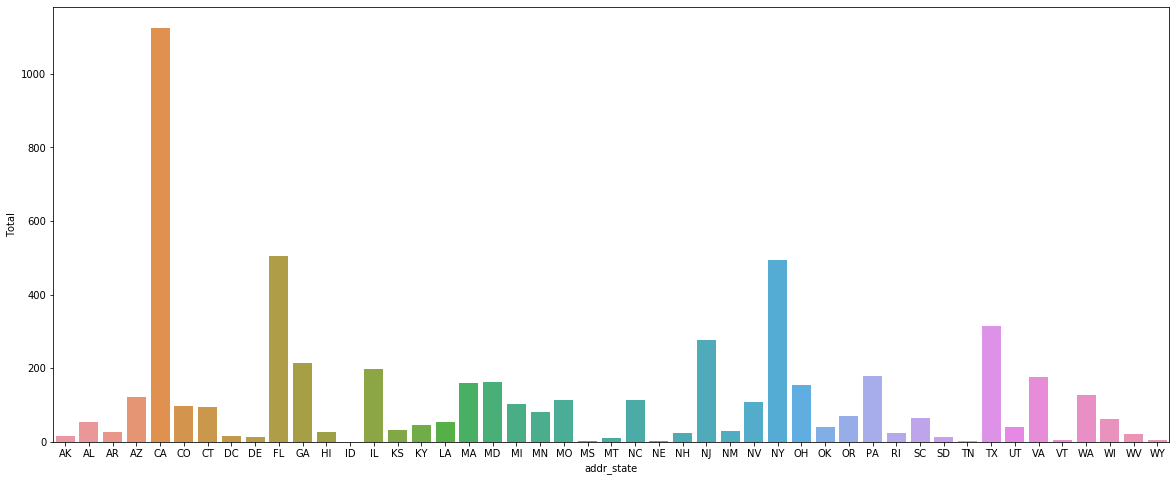

In [47]:
# addr_state - analysis on Defaulters

df_addr_state = df_lend_club[['addr_state']].groupby(['addr_state']).agg(Total =('addr_state', 'count'))

df_addr_state = df_addr_state.reset_index().set_index('addr_state', drop=False)
print(df_addr_state.Total.sort_values(ascending = False))
plt.figure(figsize=(20,8))
sns.barplot(x = 'addr_state' , y = 'Total' , data = df_addr_state)
plt.show()

In [48]:
# Added the range to Addr_status based on Count of defaulters, as Business 

def defaulter_rate(df_addr_state):

    if (df_addr_state['Total'] > 0) and (df_addr_state['Total'] <= 100):
        return 'Low'
    elif (df_addr_state['Total'] > 100) and (df_addr_state['Total'] <= 200):
        return 'Medium'
    else:
        return 'High'

df_addr_state['defaulter_rate'] = df_addr_state.apply(defaulter_rate,axis=1)
#df_addr_state_rate = df_addr_state[['addr_state', 'Total', 'defaulter_rate']]
df_addr_state.set_index('addr_state', inplace = True)
print(df_addr_state.columns)
print(df_addr_state.head(5))


Index(['Total', 'defaulter_rate'], dtype='object')
            Total defaulter_rate
addr_state                      
AK             15            Low
AL             54            Low
AR             27            Low
AZ            123         Medium
CA           1125           High


# Bivariate analysis

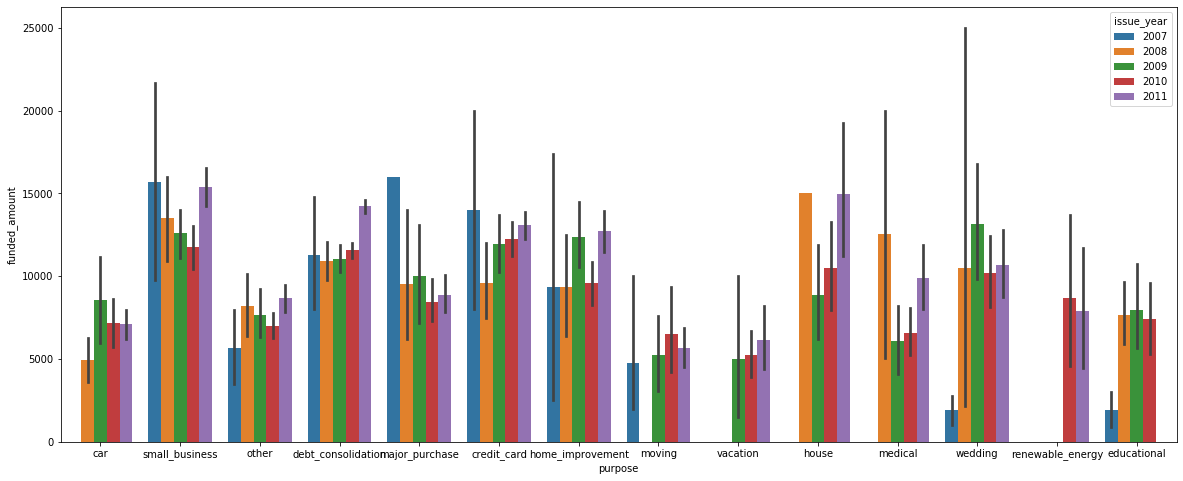

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20,8))
sns.barplot(x = 'purpose' , y = 'funded_amount', hue = 'issue_year' , data = df_lend_club, estimator = np.mean)
plt.show()

# Since debt_consolidation purpose is high on count, but in the below graph we have "Small Business" and "Credit_Card" is high
# based on the Funded amount

In [50]:
# Joining df_addr_state & df_lend_club, to get the high defaulters state

df_lend_club_state = pd.merge(df_lend_club,df_addr_state, how = 'inner', on = 'addr_state')
print(df_lend_club_state.shape)
print(df_lend_club_state.columns)

df_lend_club_state = df_lend_club_state[['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulters', 'issue_year', 'interest_Range',
       'defaulter_rate']]

print(df_lend_club_state.shape)
print(df_lend_club_state.columns)

(5627, 47)
Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 'term', 'interest_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulters', 'issue_year', 'interest_Range',
       'Total', 'defaulter_rate'],
      dtype='object')
(5627, 46)
Index(['id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_investor', 

In [51]:
df_lend_club_state.defaulter_rate.value_counts()

High      2933
Medium    1719
Low        975
Name: defaulter_rate, dtype: int64

In [52]:
# Considering High Status defaulters

df_high_state_default = df_lend_club_state.loc[df_lend_club_state.defaulter_rate == 'High']
df_high_state_default = df_high_state_default.drop(columns=['id','member_id','out_prncp','out_prncp_inv'])
print(df_high_state_default.shape)
print(df_high_state_default.columns)

(2933, 42)
Index(['loan_amount', 'funded_amount', 'funded_amount_investor', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_income', 'verification_status', 'issue_date',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'Inquiry_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'public_record', 'revol_bal',
       'revol_util', 'total_account', 'total_payment', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'defaulters',
       'issue_year', 'interest_Range', 'defaulter_rate'],
      dtype='object')


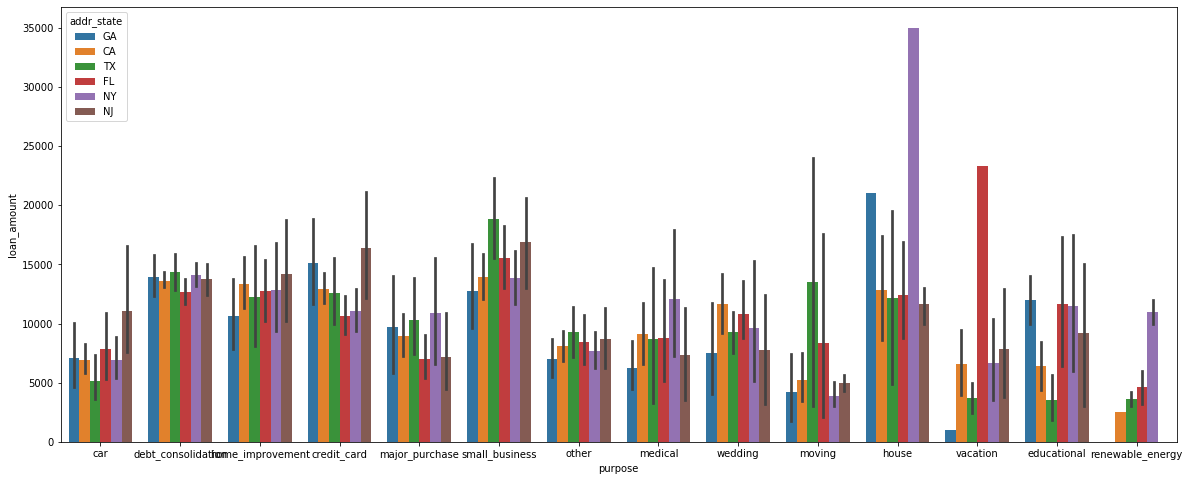

In [53]:

plt.figure(figsize=(20,8))
sns.barplot(x = 'purpose' , y = 'loan_amount', hue = 'addr_state' , data = df_high_state_default)
plt.show()

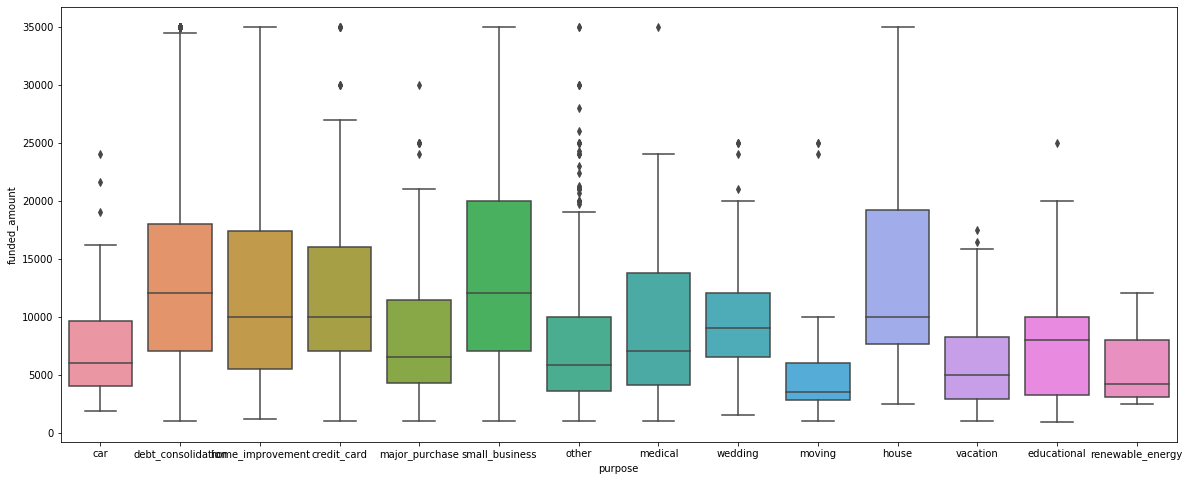

In [54]:

plt.figure(figsize=(20,8))
sns.boxplot(x = 'purpose' , y = 'funded_amount' , data = df_high_state_default)
plt.show()

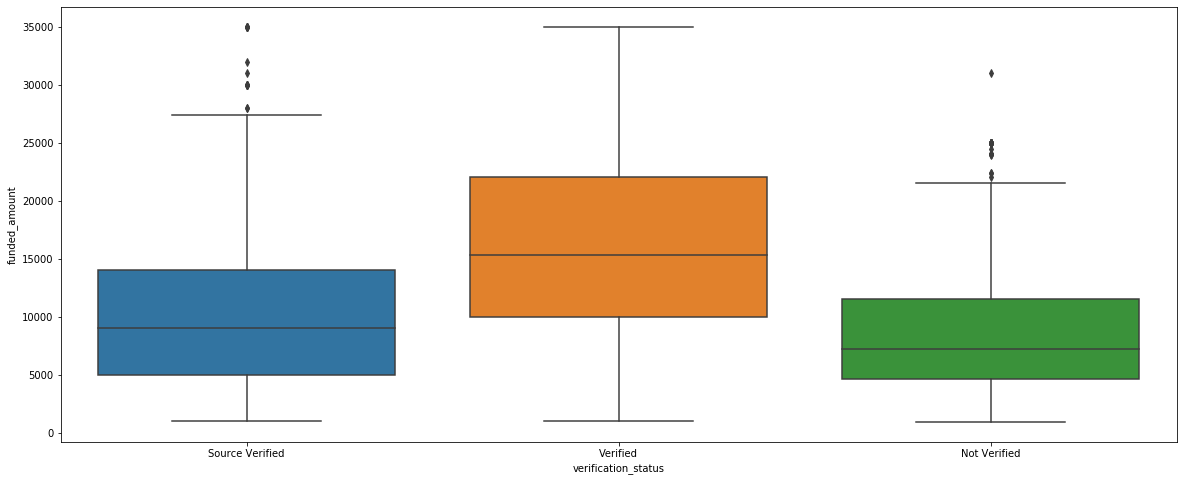

In [55]:
plt.figure(figsize=(20,8))
sns.boxplot(x = 'verification_status' , y = 'funded_amount' , data = df_high_state_default)
plt.show()

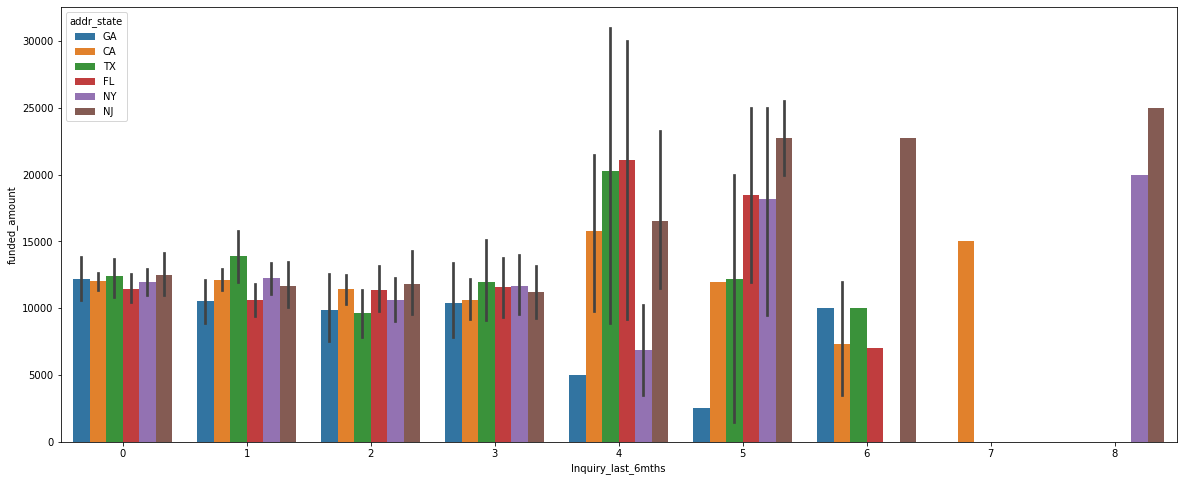

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Inquiry_last_6mths' , y = 'funded_amount', hue = 'addr_state' , data = df_high_state_default)
plt.show()

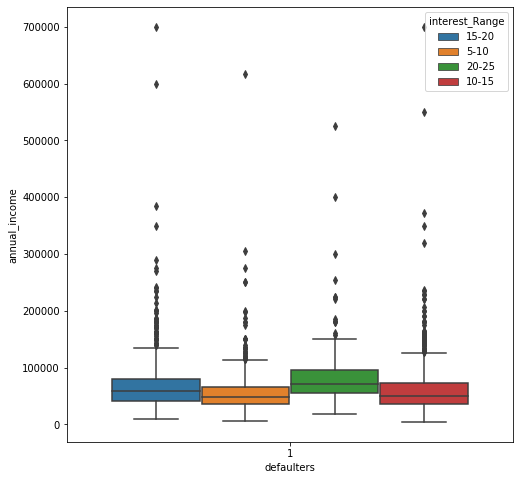

In [65]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'defaulters' , y = 'annual_income' ,hue='interest_Range', data = df_high_state_default)
plt.show()

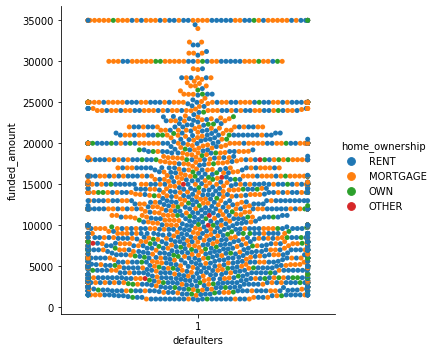

In [63]:
sns.catplot(x="defaulters", y="funded_amount", hue="home_ownership", kind="swarm", data=df_high_state_default);

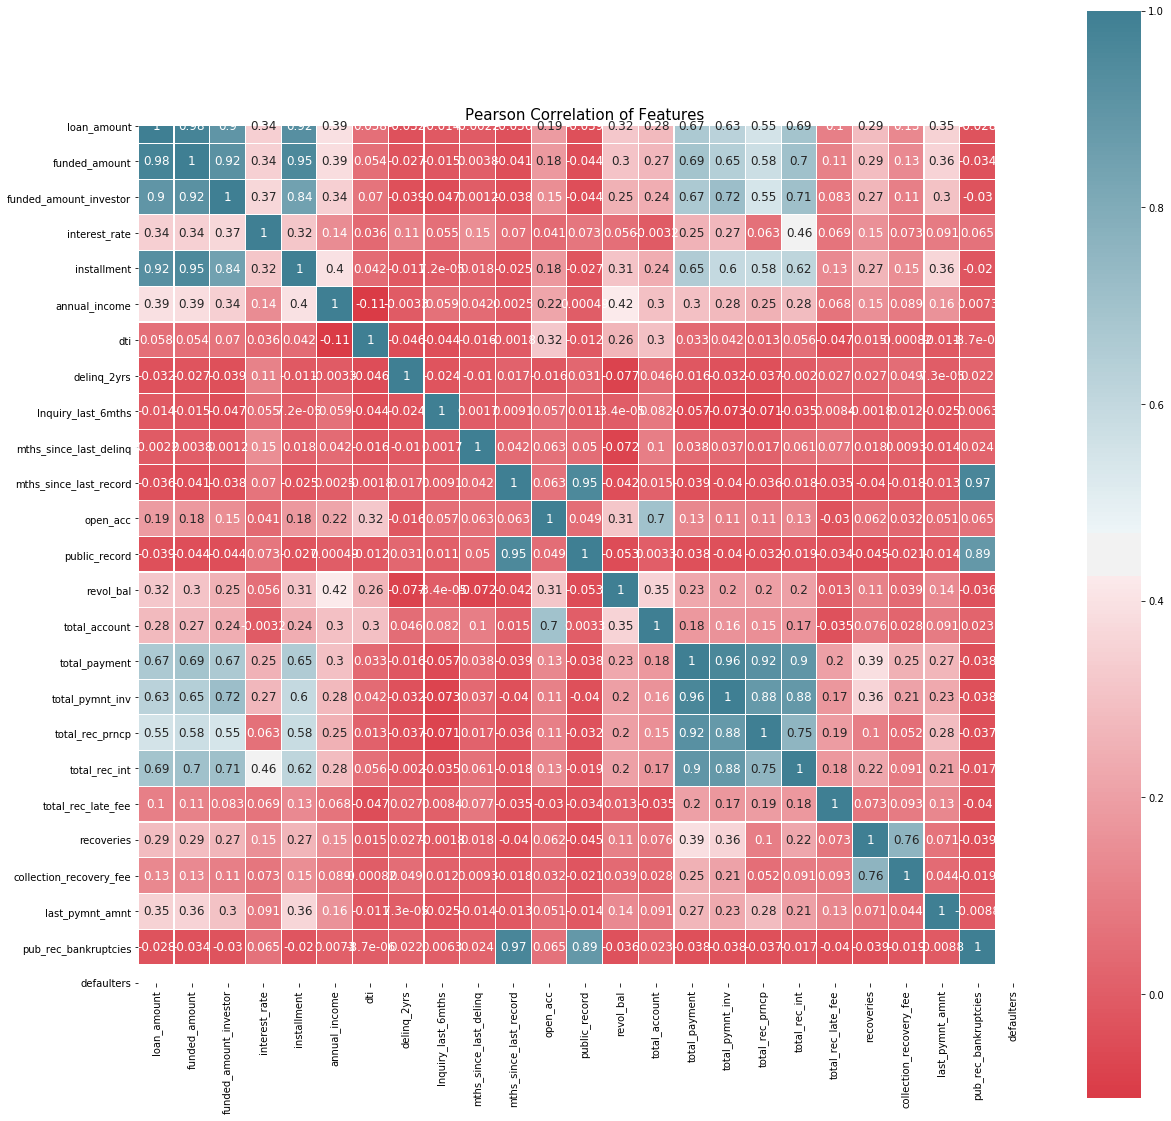

In [59]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df_high_state_default.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [60]:
df_lend_club_df['income_category'] = np.nan
lst = [df_lend_club_df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

#sns.barplot(x='dti', y='loan_status',hue='income_category' data=df_high_state_default)


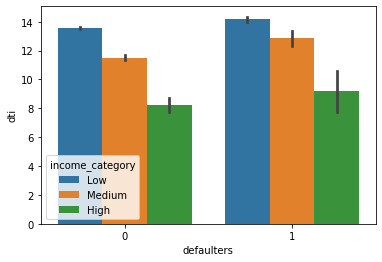

In [64]:
sns.barplot(x='defaulters', y='dti',hue='income_category',data=df_lend_club_df)

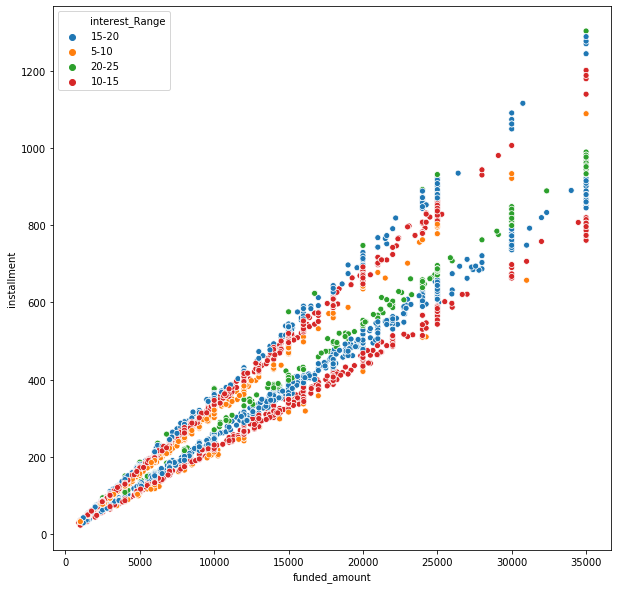

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='funded_amount', y='installment',hue='interest_Range',data=df_high_state_default)
plt.show()